In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# DATASET WITH  100 CUSTOMERS & 5 COLUMNS

In [2]:
np.random.seed(42)
data = {
    'CustomerID':np.arange(1,101),
    'Age':np.random.randint(18,65,size = 100),
    'Average_Spend':np.random.uniform(5,50,size = 100),
    'Visits_per_week':np.random.uniform(1,7,size = 100),
    'Promotion_Interest':np.random.randint(1,11,size = 100)
}

df = pd.DataFrame(data)
df.head()

,CustomerID,Age,Average_Spend,Visits_per_week,Promotion_Interest
0,1,56,18.206968,5.266897,2
1,2,46,5.633592,5.857006,9
2,3,32,13.947908,3.091996,8
3,4,60,37.010388,1.577059,10
4,5,25,40.557899,6.643140,7


# APPLYING KMeans CUSTERING TO SEGMENT CUSTOMERS INTO 3 GRPS

In [3]:
x = df.drop('CustomerID',axis = 1)
x=x.values
print(x)

[[56.         18.20696786  5.26689719  2.        ]
 [46.          5.63359202  5.85700628  9.        ]
 [32.         13.94790818  3.09199592  8.        ]
 [60.         37.01038787  1.57705931 10.        ]
 [25.         40.55789932  6.64313959  7.        ]
 [38.         32.26819887  3.38543213  9.        ]
 [56.         46.68353953  4.1065081   4.        ]
 [36.         34.29846615  6.02626064  4.        ]
 [40.         46.1731854   5.0541407   1.        ]
 [28.         43.251736    5.41129672  8.        ]
 [28.         25.22528034  2.25442972  3.        ]
 [41.          9.29345524  4.24868784  7.        ]
 [53.         21.68682135  5.1747064   2.        ]
 [57.         35.09785637  2.37130013  2.        ]
 [41.         34.96650605  2.04972956  7.        ]
 [20.         31.60840045  6.89301006  6.        ]
 [39.         17.36248068  4.09981535  3.        ]
 [19.         30.25595416  2.56497505  9.        ]
 [41.         22.23170936  6.9775222  10.        ]
 [61.         48.72704429  6.79

In [4]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i , init = 'k-means++' , random_state = 42)
    kmeans.fit(x)
    
    wcss.append(kmeans.inertia_)

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

Text(0.5, 1.0, 'The Elbow Point Graph')

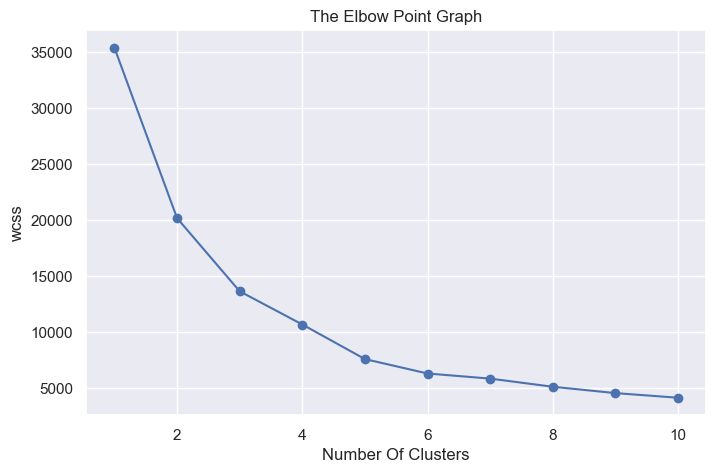

In [5]:
sns.set()
plt.figure(figsize=(8,5))
plt.plot(range(1,11),wcss,marker = 'o')
plt.xlabel('Number Of Clusters')
plt.ylabel('wcss')
plt.title("The Elbow Point Graph")

# VISUALIZING THE CLUSTERS

In [6]:
#optimum number of clusters wil be 3
kmeans = KMeans(n_clusters = 3 , init = 'k-means++', random_state = 42)

#return a label for each data point based on their Cluster
y = kmeans.fit_predict(x)

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [7]:
print(y)

[2 2 2 0 1 1 0 1 0 1 1 2 2 0 0 1 2 1 2 0 0 0 1 2 2 1 2 0 2 0 0 0 1 2 0 0 1
 0 1 1 1 0 2 1 2 2 1 0 1 2 2 0 1 0 2 0 2 2 1 0 0 1 1 1 2 1 2 2 2 2 0 1 2 1
 2 1 1 2 2 0 1 1 0 1 0 2 2 2 0 0 0 1 0 1 2 1 1 0 1 2]


In [8]:
df['Cluster'] = y

cluster_names = {0:'Daily', 1:'Promotion', 2:'Weekend'}
df['Customer Group']=df.Cluster.map(cluster_names)

In [9]:
df.head()

,CustomerID,Age,Average_Spend,Visits_per_week,Promotion_Interest,Cluster,Customer Group
0,1,56,18.206968,5.266897,2,2,Weekend
1,2,46,5.633592,5.857006,9,2,Weekend
2,3,32,13.947908,3.091996,8,2,Weekend
3,4,60,37.010388,1.577059,10,0,Daily
4,5,25,40.557899,6.643140,7,1,Promotion


Text(0, 0.5, 'Average Spend')

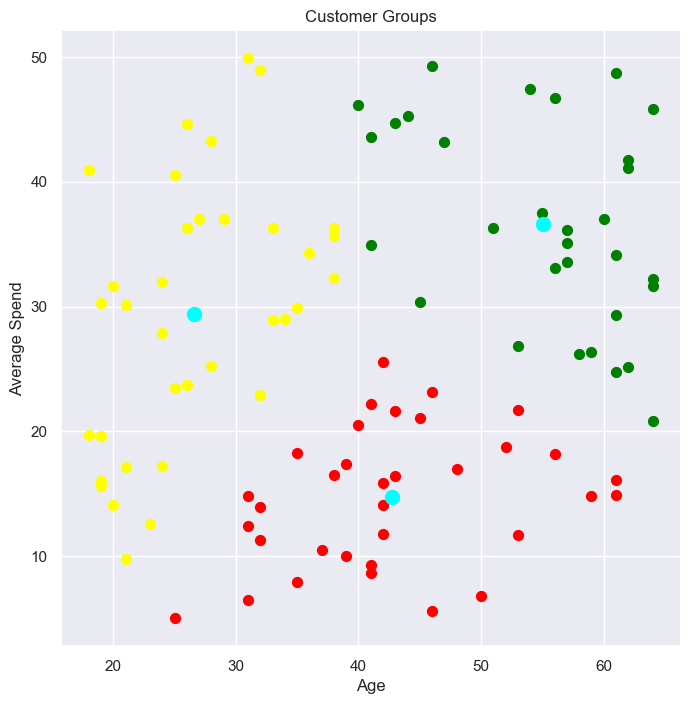

In [14]:
#plotting all the clusters

plt.figure(figsize=(8,8))
plt.scatter(x[y == 0,0], x[y == 0,1], s= 50, c='green',label = 'Cluster 1')
plt.scatter(x[y == 1,0], x[y == 1,1], s=50, c='yellow',label = 'Cluster 2')
plt.scatter(x[y == 2,0], x[y == 2,1], s=50, c= 'red',label = 'Cluster 3')


#PLOTTING ALL THE CENTROIDS

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 100 , c= 'cyan',label = 'Centroid')
plt.title('Customer Groups')
plt.xlabel('Age')
plt.ylabel('Average Spend')

# CLUSTERING PERFORMANCE

In [17]:
print(silhouette_score(x,df['Cluster']))

0.36846369703368004


# SAVE KMEANS FOR FUTURE INFERENCE

In [18]:
import pickle
pickle.dump(kmeans,open("kmeans.pickle",'wb'))


In [19]:
kmeans = pickle.load(open("kmeans.pickle","rb"))

# PREDICT THE CLUSTER OF A NEW CUSTOMER

In [34]:
def clustering(age , avg_spend, visit_per_week, promotion_interest):
    new_customer = np.array([[age, avg_spend, visit_per_week, promotion_interest]])
    predicted_cluster = kmeans.predict(new_customer)
    
    if predicted_cluster ==0:
        return "Daily"
    
    elif predicted_cluster ==1:
        return "Promotion"
    
    else:
        return "Weekend"
    
    

In [35]:
#new customer
age = 40
avg_spend = 30
visit_per_week = 4
promotion_interest = 7

predicted_cluster = clustering(age,avg_spend,visit_per_week,promotion_interest)

print(f"New Customer assigned to {predicted_cluster} Cluster")

New Customer assigned to Promotion Cluster
